In [2]:
import pandas as pd
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from functions.p4.clusters import *


voorbeeld1 = pd.read_csv("datasets/hclust.csv")
voorbeeld1.index = [f'punt {i}' for i in range(1, 11)]

# Cluster analyze

Een cluster analyze kan gezien worden als een **ADEM** of als een **UML**
ADEM ➢ Automated Data Exploration Method
UML ➢ Unsupervised Machine Learning
- Supervised learning is waarbij het leren gepaard gaat met een menselijke expert. De data is reeds gelabeld. Het resultaat is reeds gekend en moet worden nagemaakt
- Unsupervised learning is waarbij de AI geen kennis heeft over het resultaat, de data is niet gelabeld en het doet alles zelf

Een cluster wordt gevormd door rijen van een tabel die bij elkaar horen of gelijkaardig zijn
De afstand tussen 2 punten moet dus klein genoeg zijn om deze in de cluster te mogen steken

## Het plotten van punten
Dit kan gedaan worden met volgende functie

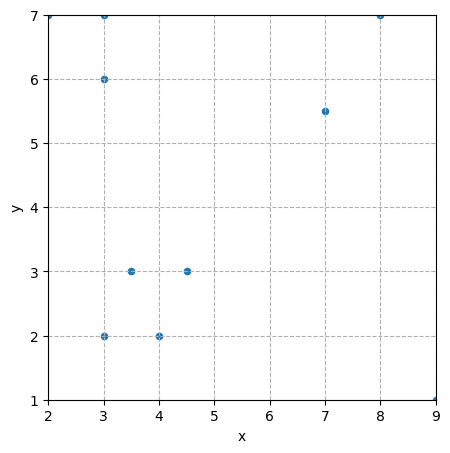

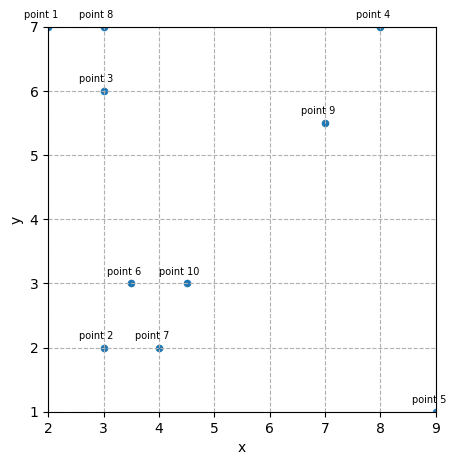

In [3]:
plotPoints(voorbeeld1)
#of
plotPoints(voorbeeld1, 'x', 'y', True)

## Afstand tussen 2 punten
Er zijn zeer veel verschillende manieren om de afstand tussen 2 punten te meten:
* Euclidish (vogelvlucht)
* Manhatten
* Cosinusgelijkheid
* ...

Elk punt heeft een coördinaat. Maakt niet uit in welke dimensie ➢ p = ($p_1,p_2,p_3,...,p_n)$


### Eigenschappen
De afstand tussen punten heeft een aantal eigenschappen:
* d(p, q) ≥ 0
* d(p, q) <=> p = q
* d(p, q) = d(q, p)
* d(p, q) +(q, r) ≥ d(p, r)

### Euclidische afstand

De euclidische afstand maakt gebruik van de stelling van pythagoras om de rechte lijn tussen punt a en b te bepalen.

Formule:
Stelling van Pythagoras:
$d(p, q) = \sqrt{\sum\limits_{i=1}^{n}(p_i - q_i)^2}$

in 2D:

$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$

in 3D:
$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2}$

etc...

##### Process
Het kan zijn dat de variabelen niet allemaal dezelfde verdeling hebben.
De oplossing ->
1. Iedere kolom omzetten naar z-scores
2. De euclidische afstand berekenen

= Gestandaardiseerde Euclidische afstand

In [4]:
#functie om de afstand te berekenen
pd.DataFrame(cdist(voorbeeld1, voorbeeld1, 'euclidean'), index=voorbeeld1.index, columns=voorbeeld1.index) #Niet Gestandaardiseerde waarde

pd.DataFrame(cdist(voorbeeld1, voorbeeld1, 'seuclidean'), index=voorbeeld1.index, columns=voorbeeld1.index) #Gestandaardiseerde waarde

,punt 1,punt 2,punt 3,punt 4,punt 5,punt 6,punt 7,punt 8,punt 9,punt 10
punt 1,0.000000,5.099020,1.414214,6.000000,9.219544,4.272002,5.385165,1.000000,5.220153,4.716991
punt 2,5.099020,0.000000,4.000000,7.071068,6.082763,1.118034,1.000000,5.000000,5.315073,1.802776
punt 3,1.414214,4.000000,0.000000,5.099020,7.810250,3.041381,4.123106,1.000000,4.031129,3.354102
punt 4,6.000000,7.071068,5.099020,0.000000,6.082763,6.020797,6.403124,5.000000,1.802776,5.315073
punt 5,9.219544,6.082763,7.810250,6.082763,0.000000,5.852350,5.099020,8.485281,4.924429,4.924429
punt 6,4.272002,1.118034,3.041381,6.020797,5.852350,0.000000,1.118034,4.031129,4.301163,1.000000
punt 7,5.385165,1.000000,4.123106,6.403124,5.099020,1.118034,0.000000,5.099020,4.609772,1.118034
punt 8,1.000000,5.000000,1.000000,5.000000,8.485281,4.031129,5.099020,0.000000,4.272002,4.272002
punt 9,5.220153,5.315073,4.031129,1.802776,4.924429,4.301163,4.609772,4.272002,0.000000,3.535534
punt 10,4.716991,1.802776,3.354102,5.315073,4.924429,1.000000,1.118034,4.272002,3.535534,0.000000


,punt 1,punt 2,punt 3,punt 4,punt 5,punt 6,punt 7,punt 8,punt 9,punt 10
punt 1,0.000000,2.198906,0.605633,2.549883,3.943654,1.839919,2.318839,0.424980,2.221288,2.026755
punt 2,2.198906,0.000000,1.725958,3.028166,2.586133,0.480973,0.424980,2.157448,2.273869,0.769774
punt 3,0.605633,1.725958,0.000000,2.168269,3.340132,1.311793,1.777510,0.431490,1.713558,1.442920
punt 4,2.549883,3.028166,2.168269,0.000000,2.623586,2.576092,2.746692,2.124902,0.774287,2.278461
punt 5,3.943654,2.586133,3.340132,2.623586,0.000000,2.491613,2.168269,3.633799,2.119586,2.098107
punt 6,1.839919,0.480973,1.311793,2.576092,2.491613,0.000000,0.480973,1.738989,1.837416,0.424980
punt 7,2.318839,0.424980,1.777510,2.746692,2.168269,0.480973,0.000000,2.198906,1.976416,0.480973
punt 8,0.424980,2.157448,0.431490,2.124902,3.633799,1.738989,2.198906,0.000000,1.818968,1.839919
punt 9,2.221288,2.273869,1.713558,0.774287,2.119586,1.837416,1.976416,1.818968,0.000000,1.514083
punt 10,2.026755,0.769774,1.442920,2.278461,2.098107,0.424980,0.480973,1.839919,1.514083,0.000000


### Manhatten afstand
De Manhatten afstand berekent niet de korste weg tussen 2 punten maar de 'eigenlijke' afstand
<br>
<img src="https://static.wikia.nocookie.net/minecraft_gamepedia/images/8/89/Taxicab_vs_euclidean.png/revision/latest/scale-to-width-down/1000?cb=20211015214002" width=350 height=200 >
Formule:
$d(p, q) = \sum\limits_{i = 1}^{n}|p_i - q_i|$

In [13]:
#functie om de afstand te bepalen
pd.DataFrame(cdist(voorbeeld1, voorbeeld1, 'cityblock'), index=voorbeeld1.index, columns=voorbeeld1.index)

,punt 1,punt 2,punt 3,punt 4,punt 5,punt 6,punt 7,punt 8,punt 9,punt 10
punt 1,0.0,6.0,2.0,6.0,13.0,5.5,7.0,1.0,6.5,6.5
punt 2,6.0,0.0,4.0,10.0,7.0,1.5,1.0,5.0,7.5,2.5
punt 3,2.0,4.0,0.0,6.0,11.0,3.5,5.0,1.0,4.5,4.5
punt 4,6.0,10.0,6.0,0.0,7.0,8.5,9.0,5.0,2.5,7.5
punt 5,13.0,7.0,11.0,7.0,0.0,7.5,6.0,12.0,6.5,6.5
punt 6,5.5,1.5,3.5,8.5,7.5,0.0,1.5,4.5,6.0,1.0
punt 7,7.0,1.0,5.0,9.0,6.0,1.5,0.0,6.0,6.5,1.5
punt 8,1.0,5.0,1.0,5.0,12.0,4.5,6.0,0.0,5.5,5.5
punt 9,6.5,7.5,4.5,2.5,6.5,6.0,6.5,5.5,0.0,5.0
punt 10,6.5,2.5,4.5,7.5,6.5,1.0,1.5,5.5,5.0,0.0


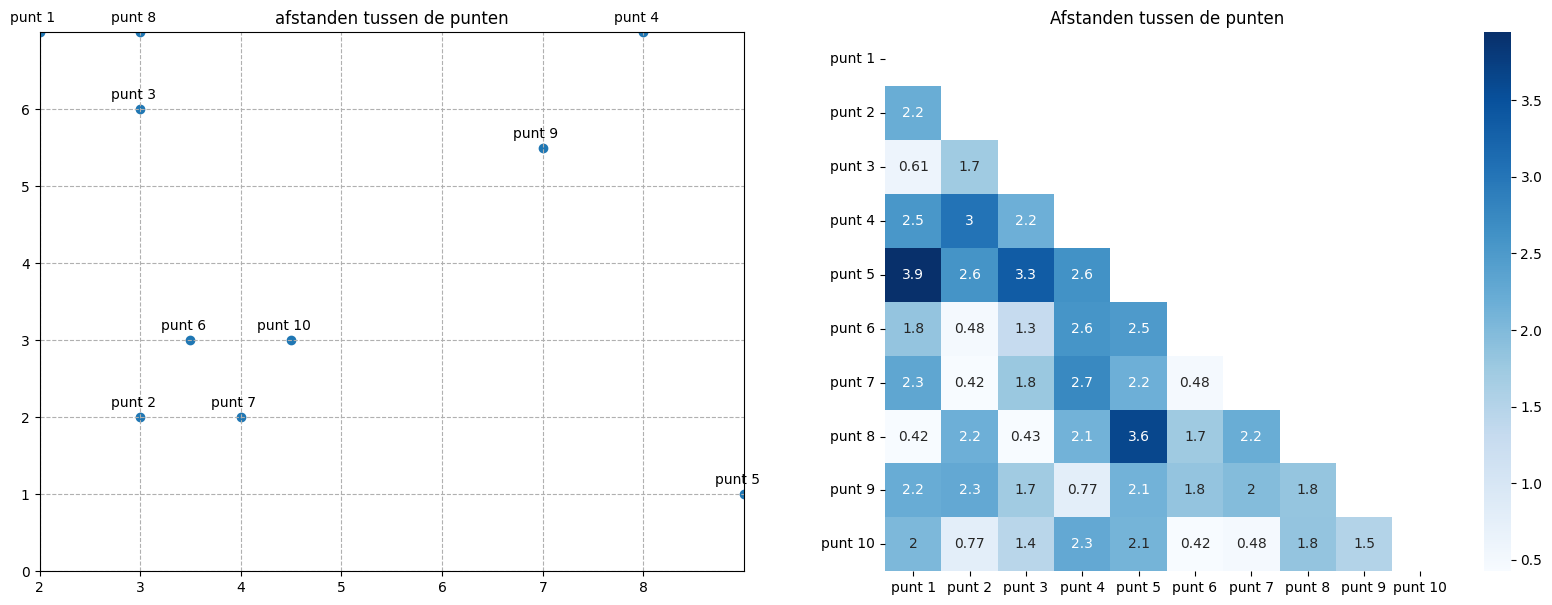

In [6]:
#Of de afstanden in een grafiek
plotAfstanden(voorbeeld1, pd.DataFrame(cdist(voorbeeld1, voorbeeld1, 'seuclidean'), index=voorbeeld1.index, columns=voorbeeld1.index), names=True)

## Clusters zoeken

### K-means
Het K-means algoritme gaat op zoek naar k clusters waarbij k is gegeven.

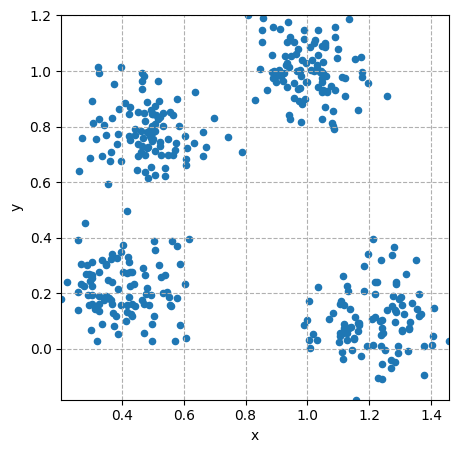

In [7]:
voorbeeld2 = pd.read_csv("datasets/voorbeeld.csv")
plotPoints(voorbeeld2)

,x,y,cluster
0,0.465681,0.991396,3
1,0.575295,0.741192,3
2,0.463535,0.731243,3
3,0.474027,0.819973,3
4,0.387885,0.774880,3
...,...,...,...
395,1.117123,0.088956,1
396,1.211944,0.394294,1
397,1.328287,0.075084,1
398,1.128065,0.225451,1


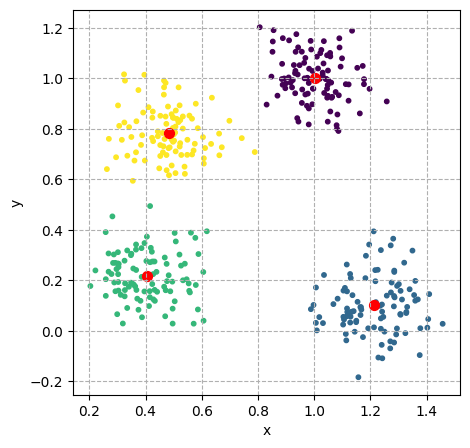

In [8]:
kMeans(voorbeeld2, 4)

Het K-means algoritme moet verteld worden hoeveel clusters er moeten gemaakt worden

## Hiërarchische Clustering

### Agglomeratieve Clustering
Agglomeratieve clustering is een voorbeeld van hiërarchisch clustering. Hierbij worden de punten gegroepeerd in clusters op basis van de afstand tussen de punten. De clusters worden vervolgens samengevoegd tot grotere clusters. Dit proces wordt herhaald totdat alle punten in één cluster zitten.

Er bestaan nog andere hiërarchische clustering algoritmen, maar deze worden hier niet besproken.

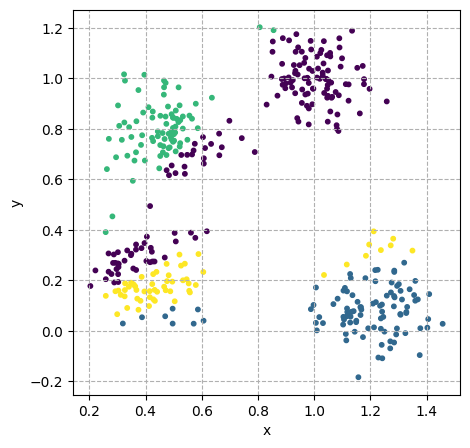

In [9]:
agglo(voorbeeld2, 4)

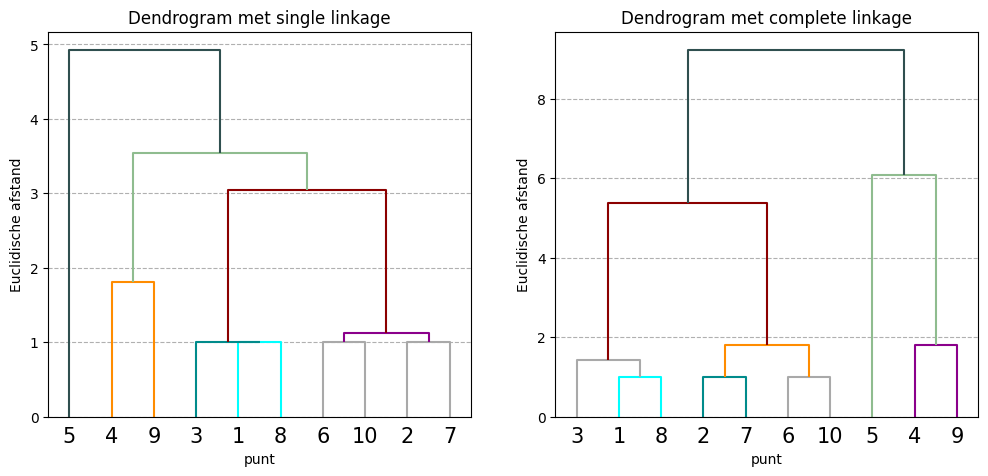

In [10]:
dendogram(voorbeeld1)

In [11]:
cuttree(voorbeeld1)

,0
0,0
2,0
7,0
1,1
6,1
3,2
4,3
5,4
9,4
8,5
